### Table of Contents


* [Chapter 1: Nos tables initiales](#chapter1)
    * [Section 1.1:La question des produits non-référencés](#section_1_1)
    * [Section 2.2: La question des dates](#section_1_2)
    * [Section 1.3: Le df final](#section_1_3)
* [Chapter 2: Les demandes d'Antoine](#chapter2)
    * [Section 2.1: Indicateurs et graphiques autour du CA (+ évolution dans le temps)](#section_2_1)
    * [Section 2.2: La répartition du CA](#section_2_2)
    * [Section 2.3: Zoom sur les références (tops/flops)](#section_2_3)
    * [Section 2.4: Quelques informations sur les profils de nos clients](#section_2_4)
* [Chapter 3: Les demandes Julie](#chapter3)
    * [Section 3.1: le lien entre le genre d’un client et les catégories des livres achetés](#section_3_1)
    * [Section 3.2: le lien entre l'âge des clients et le montant total des achats ](#section_3_2)
    * [Section 3.3: le lien entre l'âge des clients et la fréquence d'achat](#section_3_3)
    * [Section 3.4: le lien entre l'âge des clients et la taille du panier moyen](#section_3_4)
    * [Section 3.5: le lien entre l'âge des clients et les catégories des livres achetés](#section_3_5)
    * [Section 3.6: La probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159](#section_3_6)
    
    
    

# Chapter 1: Nos tables initiales <a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
df_customers = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\customers.csv")
df_transactions = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\transactions.csv")
df_products = pd.read_csv(r"C:\Users\tangu\OneDrive\Bureau\products.csv")

In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [4]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [5]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [6]:
# Créons notre table de travail
df_customers.drop_duplicates(subset = "client_id", inplace = True) 
df_products.drop_duplicates(subset = "id_prod", inplace = True)

In [7]:
"""
Nous nous baserons toujours sur la table transaction qui fait le pont:
- un individu qui n'est pas présent dans la table transaction n'est pas un client. Donc il ne sera pas pris en considération
- des articles non présents dans la table transaction sont un catalogue, ne participant pas au CA
"""

"\nNous nous baserons toujours sur la table transaction qui fait le pont:\n- un individu qui n'est pas présent dans la table transaction n'est pas un client. Donc il ne sera pas pris en considération\n- des articles non présents dans la table transaction sont un catalogue, ne participant pas au CA\n"

In [8]:
df_intermediaire = df_transactions.merge(df_customers, how = 'left', on = 'client_id')

In [9]:
df_final = df_intermediaire.merge(df_products, how = "left", on = "id_prod")

In [10]:
df_final = df_final.reindex(columns = ["session_id","date","client_id","sex","birth","id_prod","price","categ"])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679532 entries, 0 to 679531
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  679532 non-null  object 
 1   date        679532 non-null  object 
 2   client_id   679532 non-null  object 
 3   sex         679532 non-null  object 
 4   birth       679532 non-null  int64  
 5   id_prod     679532 non-null  object 
 6   price       679311 non-null  float64
 7   categ       679311 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 46.7+ MB


### Section 1.1: La question des produits non-référencés <a class="anchor" id="section_1_1"></a>

In [11]:
""" 
ici on remarque que parmi nos valeurs, 221 lignes n'ont pas de 'price' ou de 'categ' renseigné (voire les 2)
nous pouvons donc en déduire que dans la table transaction, il y a des id_prod qui ne sont pas référencés dans df_products:
impossible donc de connaître le prix ou la catégorie de ces produits 
Si on ne peut pas obtenir ces informations, les lignes concernées ne sont pas pertinentes: nous allons les supprimer. 
"""

" \nici on remarque que parmi nos valeurs, 221 lignes n'ont pas de 'price' ou de 'categ' renseigné (voire les 2)\nnous pouvons donc en déduire que dans la table transaction, il y a des id_prod qui ne sont pas référencés dans df_products:\nimpossible donc de connaître le prix ou la catégorie de ces produits \nSi on ne peut pas obtenir ces informations, les lignes concernées ne sont pas pertinentes: nous allons les supprimer. \n"

In [12]:
df_final.dropna(how = 'any', subset = ["price","categ"], inplace = True )

In [13]:
# nous pouvons tout de même regarder succintement à quoi ressemblaient ces produits:
df_produits_nonAchetés = df_transactions.merge(df_products, how = "outer", on = "id_prod", indicator=True).query('_merge=="left_only"')
df_produits_nonAchetés.head()
# ces produits ne sont pas référencés

,id_prod,date,session_id,client_id,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only


In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679311 entries, 0 to 679531
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  679311 non-null  object 
 1   date        679311 non-null  object 
 2   client_id   679311 non-null  object 
 3   sex         679311 non-null  object 
 4   birth       679311 non-null  int64  
 5   id_prod     679311 non-null  object 
 6   price       679311 non-null  float64
 7   categ       679311 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 46.6+ MB


### Section 1.2: La question des dates <a class="anchor" id="section_1_2"></a>

In [15]:
# les dates sont très (trop) précises pour l'analyse de ventes de livres
df_final.head()

,session_id,date,client_id,sex,birth,id_prod,price,categ
0,s_211425,2022-05-20 13:21:29.043970,c_103,f,1986,0_1518,4.18,0.0
1,s_158752,2022-02-02 07:55:19.149409,c_8534,m,1988,1_251,15.99,1.0
2,s_225667,2022-06-18 15:44:33.155329,c_6714,f,1968,0_1277,7.99,0.0
3,s_52962,2021-06-24 04:19:29.835891,c_6941,m,2000,2_209,69.99,2.0
4,s_325227,2023-01-11 08:22:08.194479,c_4232,m,1980,0_1509,4.99,0.0


In [16]:
valeurs_test = df_final.query('date.str.contains("test")', engine = "python")
len(valeurs_test)

200

In [17]:
index_valeurs_test = valeurs_test.index

In [18]:
df_final.drop(index_valeurs_test, inplace = True)

In [19]:
print( df_final[df_final['session_id'] == 's_211425']  )

       session_id                        date client_id sex  birth id_prod  \
0        s_211425  2022-05-20 13:21:29.043970     c_103   f   1986  0_1518   
448454   s_211425  2022-05-20 13:21:10.122134     c_103   f   1986   1_271   

        price  categ  
0        4.18    0.0  
448454  16.99    1.0  


In [20]:
df_final['date'] = pd.to_datetime(df_final['date'])
df_final["date_jours"] = df_final["date"].dt.date
del df_final["date"]

In [21]:
df_final.head()

,session_id,client_id,sex,birth,id_prod,price,categ,date_jours
0,s_211425,c_103,f,1986,0_1518,4.18,0.0,2022-05-20
1,s_158752,c_8534,m,1988,1_251,15.99,1.0,2022-02-02
2,s_225667,c_6714,f,1968,0_1277,7.99,0.0,2022-06-18
3,s_52962,c_6941,m,2000,2_209,69.99,2.0,2021-06-24
4,s_325227,c_4232,m,1980,0_1509,4.99,0.0,2023-01-11


### Section 1.3: Le df final <a class="anchor" id="section_1_3"></a>

In [22]:
 df_final.head()

,session_id,client_id,sex,birth,id_prod,price,categ,date_jours
0,s_211425,c_103,f,1986,0_1518,4.18,0.0,2022-05-20
1,s_158752,c_8534,m,1988,1_251,15.99,1.0,2022-02-02
2,s_225667,c_6714,f,1968,0_1277,7.99,0.0,2022-06-18
3,s_52962,c_6941,m,2000,2_209,69.99,2.0,2021-06-24
4,s_325227,c_4232,m,1980,0_1509,4.99,0.0,2023-01-11


In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679531
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  679111 non-null  object 
 1   client_id   679111 non-null  object 
 2   sex         679111 non-null  object 
 3   birth       679111 non-null  int64  
 4   id_prod     679111 non-null  object 
 5   price       679111 non-null  float64
 6   categ       679111 non-null  float64
 7   date_jours  679111 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 46.6+ MB


# Chapter 2: Les demandes d'Antoines <a class="anchor" id="chapter2"></a>
### Section 2.1: Indicateurs et graphiques autour du CA (+ évolution dans le temps) <a class="anchor" id="section_2_1"></a>


#### Calcul du CA total sur notre période: 

In [24]:
# juste faire la somme de tous les produits vendus
CA_total = df_final["price"].sum()
print("Le CA total de notre entreprise sur la période étudiée est: ", CA_total, "€.")

Le CA total de notre entreprise sur la période étudiée est:  11853728.68 €.


#### Evolution du CA quotidien dans le temps: 

In [25]:
df_CA_evolv = pd.pivot_table(df_final, values = 'price', index=['date_jours'], aggfunc=np.sum)
df_CA_evolv = df_CA_evolv.sort_values('date_jours')
df_CA_evolv.rename(columns = {"price":"CA_quotidien"}, inplace = True)
df_CA_evolv.shape

(730, 1)

In [26]:
df_CA_evolv.reset_index(inplace = True)
df_CA_evolv.head()

,date_jours,CA_quotidien
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37


In [27]:
df_CA_evolv.dtypes

date_jours       object
CA_quotidien    float64
dtype: object

In [28]:
# on veut le CA de chaque mois
df_CA_evolv['date_jours'] = pd.to_datetime(df_CA_evolv['date_jours'])
df_CA_evolv["année_mois"] = df_CA_evolv['date_jours'].dt.strftime('%Y-%m')
del df_CA_evolv['date_jours']
df_CA_evolv = df_CA_evolv.groupby("année_mois").sum("CA_quotidien")
df_CA_evolv.rename(columns = {"CA_quotidien":"CA_mensuel"}, inplace = True)

In [29]:
df_CA_evolv['MM5'] = df_CA_evolv.rolling(window=5).mean()

In [30]:
df_CA_evolv.head()

,CA_mensuel,MM5
année_mois,,
2021-03,482440.61,NaN
2021-04,476109.30,NaN
2021-05,492943.47,NaN
2021-06,484088.56,NaN
2021-07,482835.40,483683.468


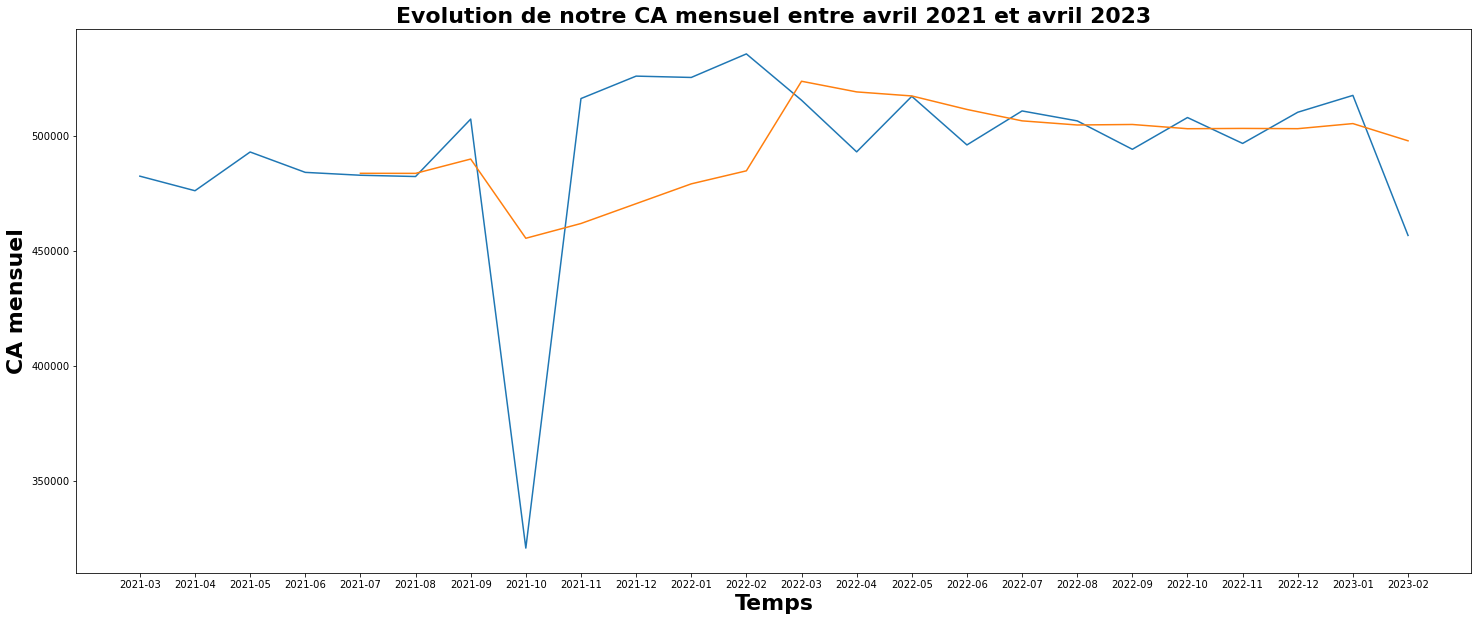

In [31]:
x = df_CA_evolv.index
y = df_CA_evolv['CA_mensuel']
z = df_CA_evolv['MM5']

fig1 = plt.figure(1)
plt.plot(x, y)
plt.plot(x, z)
plt.title("Evolution de notre CA mensuel entre avril 2021 et avril 2023", {'weight' : 'bold', 'size'   : 22} )
          
plt.xlabel("Temps", {'weight' : 'bold', 'size'   : 22} )
plt.ylabel("CA mensuel", {'weight' : 'bold', 'size'   : 22})

fig1.set_size_inches(25, 10)

plt.show() 

### Section 2.2: La répartition du CA <a class="anchor" id="section_2_2"></a>

In [32]:
df_top_categ = df_final.iloc[:,[4,5,6]]
df_top_categ = df_top_categ.groupby(['categ']).agg({'id_prod':'count', 'price':'sum'})
df_top_categ.rename(columns = {"price":"CA_categ", "id_prod":"nb_ventes"}, inplace = True)
print(df_top_categ.sort_values("CA_categ", ascending = False ))

       nb_ventes      CA_categ
categ                         
1.0       227169  4.653723e+06
0.0       415459  4.419731e+06
2.0        36483  2.780275e+06


Text(0.5, 1.0, 'Repartition du CA par categorie')

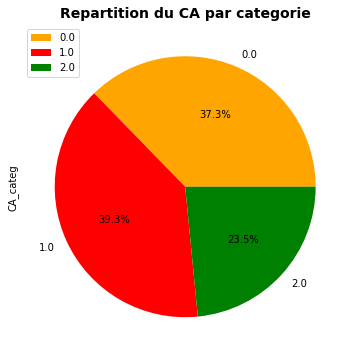

In [33]:
mycolors = ["orange", "red", "green"]
plot = df_top_categ.plot.pie(y='CA_categ', figsize=(6, 6),colors = mycolors, autopct='%1.1f%%')
plt.title("Repartition du CA par categorie", {'weight' : 'bold', 'size'   : 14})

Text(0.5, 1.0, 'Repartition du nombre de ventes par categorie')

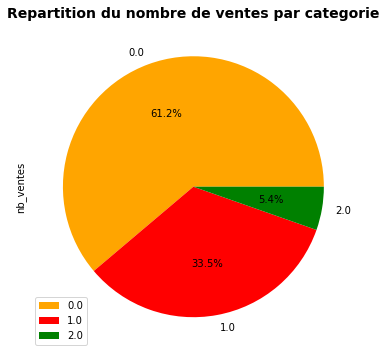

In [34]:
mycolors = ["orange", "red", "green"]
plot = df_top_categ.plot.pie(y="nb_ventes", figsize=(6, 6),colors = mycolors, autopct='%1.1f%%')
plt.title("Repartition du nombre de ventes par categorie", {'weight' : 'bold', 'size'   : 14})

### Section 2.3: zoom sur les références (tops/flops) <a class="anchor" id="section_2_3"></a>

In [35]:
df_final.head()

,session_id,client_id,sex,birth,id_prod,price,categ,date_jours
0,s_211425,c_103,f,1986,0_1518,4.18,0.0,2022-05-20
1,s_158752,c_8534,m,1988,1_251,15.99,1.0,2022-02-02
2,s_225667,c_6714,f,1968,0_1277,7.99,0.0,2022-06-18
3,s_52962,c_6941,m,2000,2_209,69.99,2.0,2021-06-24
4,s_325227,c_4232,m,1980,0_1509,4.99,0.0,2023-01-11


In [36]:
df_top_flop = df_final.groupby(['id_prod', 'categ']).agg({'price':'sum', 'id_prod':'count'})
df_top_flop.rename(columns = {"price":"CA_produit", "id_prod":"nb_ventes"}, inplace = True)
print("Au total, nous avons:", len(df_top_flop) , "différents produits de notre catalogue qui ont été acheté au moins une fois.\n Ci-dessous le top/flop des produits toutes catégories confondues:" )
df_top_flop.sort_values("CA_produit", ascending = False)

Au total, nous avons: 3265 différents produits de notre catalogue qui ont été acheté au moins une fois.
 Ci-dessous le top/flop des produits toutes catégories confondues:


,,CA_produit,nb_ventes
id_prod,categ,,
2_159,2.0,94893.50,650
2_135,2.0,69334.95,1005
2_112,2.0,65407.76,968
2_102,2.0,60736.78,1027
2_209,2.0,56971.86,814
...,...,...,...
0_1601,0.0,1.99,1
0_807,0.0,1.99,1
0_1653,0.0,1.98,2


In [37]:
# maintenant les tops/flops par catégories 

In [38]:
df_top_flop.reset_index(inplace = True)

In [39]:
# La catégorie 0
df_ranking_cat0 = df_top_flop[df_top_flop['categ'] == 0.0].copy()
print(len(df_ranking_cat0), " produits appartiennent à la catégorie 0. \n Ci-dessous le top/flop de cette catégorie:" )
df_ranking_cat0.sort_values("CA_produit", ascending = False)
df_ranking_cat0.reset_index(inplace = True)
print(df_ranking_cat0)

2292  produits appartiennent à la catégorie 0. 
 Ci-dessous le top/flop de cette catégorie:
      index id_prod  categ  CA_produit  nb_ventes
0         0     0_0    0.0     4657.50       1242
1         1     0_1    0.0     5352.13        487
2         2    0_10    0.0      394.90         22
3         3   0_100    0.0       61.80          3
4         4  0_1000    0.0     2954.88        432
...     ...     ...    ...         ...        ...
2287   2287   0_995    0.0     4044.32        368
2288   2288   0_996    0.0     4970.28        427
2289   2289   0_997    0.0     4375.62        438
2290   2290   0_998    0.0     4234.50        450
2291   2291   0_999    0.0     4095.90        410

[2292 rows x 5 columns]


In [40]:
# la catégorie 1
df_ranking_cat1 = df_top_flop[df_top_flop['categ'] == 1.0]
print(len(df_ranking_cat1), " produits appartiennent à la catégorie 1. \n Ci-dessous le top/flop de cette catégorie:" )
df_ranking_cat1.sort_values("CA_produit", ascending = False)

737  produits appartiennent à la catégorie 1. 
 Ci-dessous le top/flop de cette catégorie:


,id_prod,categ,CA_produit,nb_ventes
2619,1_395,1.0,54356.25,1875
2591,1_369,1.0,54025.48,2252
2641,1_414,1.0,51949.40,2180
2607,1_383,1.0,51486.24,1776
2733,1_498,1.0,49731.36,2128
...,...,...,...,...
2630,1_404,1.0,29.55,3
2706,1_473,1.0,26.91,9
2703,1_470,1.0,21.64,4
2431,1_224,1.0,19.80,4


In [41]:
# la catégorie 2
df_ranking_cat2 = df_top_flop[df_top_flop['categ'] == 2.0]
print(len(df_ranking_cat2), " produits appartiennent à la catégorie 2. \n Ci-dessous le top/flop de cette catégorie:" )
df_ranking_cat2.sort_values("CA_produit", ascending = False)

236  produits appartiennent à la catégorie 2. 
 Ci-dessous le top/flop de cette catégorie:


,id_prod,categ,CA_produit,nb_ventes
3096,2_159,2.0,94893.50,650
3070,2_135,2.0,69334.95,1005
3045,2_112,2.0,65407.76,968
3034,2_102,2.0,60736.78,1027
3152,2_209,2.0,56971.86,814
...,...,...,...,...
3039,2_107,2.0,203.94,6
3258,2_93,2.0,157.98,2
3263,2_98,2.0,149.74,1
3175,2_23,2.0,115.99,1


### Section 2.4: quelques informations sur les profils de nos clients <a class="anchor" id="section_2_4"></a>

In [42]:
df_final.head()

,session_id,client_id,sex,birth,id_prod,price,categ,date_jours
0,s_211425,c_103,f,1986,0_1518,4.18,0.0,2022-05-20
1,s_158752,c_8534,m,1988,1_251,15.99,1.0,2022-02-02
2,s_225667,c_6714,f,1968,0_1277,7.99,0.0,2022-06-18
3,s_52962,c_6941,m,2000,2_209,69.99,2.0,2021-06-24
4,s_325227,c_4232,m,1980,0_1509,4.99,0.0,2023-01-11


In [43]:
df_info_clients = df_final.iloc[:,[1,2,3,5]].groupby(["client_id","sex","birth"]).sum('price')
df_info_clients.reset_index(inplace = True)
df_info_clients.rename(columns = {"price":"panier_indiv"}, inplace = True)
df_info_clients.head()

,client_id,sex,birth,panier_indiv
0,c_1,m,1955,558.18
1,c_10,m,1956,1353.60
2,c_100,m,1992,254.85
3,c_1000,f,1966,2261.89
4,c_1001,m,1982,1812.86


In [44]:
proportion_genre = len(df_info_clients[df_info_clients["sex"] == 'f']) / len(df_info_clients)
print("Parmi nos clients, ", round(proportion_genre*100,2) ,"% sont des clientes!")

Parmi nos clients,  52.08 % sont des clientes!


In [45]:
df_info_clients.describe()

,birth,panier_indiv
count,8600.000000,8600.000000
mean,1978.260698,1378.340544
std,16.908755,5182.542488
min,1929.000000,6.310000
25%,1966.000000,547.630000
50%,1979.000000,1027.020000
75%,1992.000000,1779.500000
max,2004.000000,324033.350000


In [46]:
df_info_clients = df_final.iloc[:,[1,5,6]].groupby(["client_id","categ"]).sum('price')
df_info_clients.reset_index(inplace = True)
df_info_clients.head()

,client_id,categ,price
0,c_1,0.0,360.15
1,c_1,1.0,143.16
2,c_1,2.0,54.87
3,c_10,0.0,263.87
4,c_10,1.0,809.77


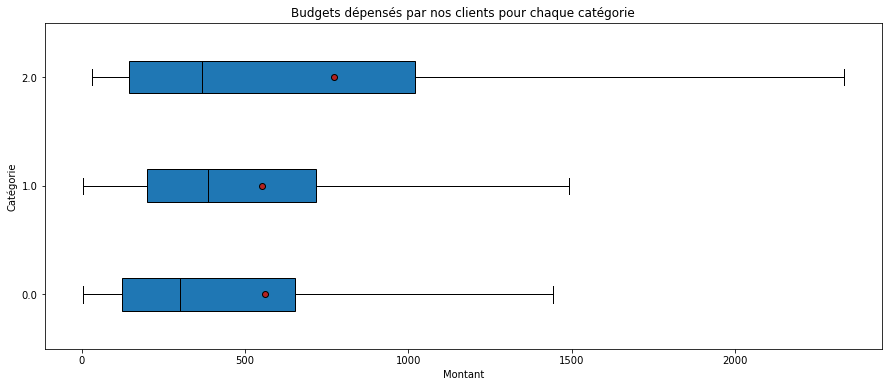

In [47]:
from matplotlib.patches import Polygon

X = "categ"
Y = "price"

modalites = df_info_clients[X].unique()
groupes = []
for m in modalites:
    groupes.append(df_info_clients[df_info_clients[X]==m][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
fig = plt.figure(1, figsize=(15, 6))

plt.xlabel('Montant')
plt.ylabel('Catégorie')
plt.title('Budgets dépensés par nos clients pour chaque catégorie')


plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

#### la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz:


In [48]:
df_final.head()

,session_id,client_id,sex,birth,id_prod,price,categ,date_jours
0,s_211425,c_103,f,1986,0_1518,4.18,0.0,2022-05-20
1,s_158752,c_8534,m,1988,1_251,15.99,1.0,2022-02-02
2,s_225667,c_6714,f,1968,0_1277,7.99,0.0,2022-06-18
3,s_52962,c_6941,m,2000,2_209,69.99,2.0,2021-06-24
4,s_325227,c_4232,m,1980,0_1509,4.99,0.0,2023-01-11


In [49]:
df_courbe_lorenz = df_final.iloc[:,[1,5]].groupby(["client_id"]).sum('price').sort_values('price')
df_courbe_lorenz.rename(columns = {"price":"CA_client"}, inplace = True)
df_courbe_lorenz.head()

,CA_client
client_id,
c_8351,6.31
c_8140,8.30
c_8114,9.98
c_240,11.06
c_4648,11.20


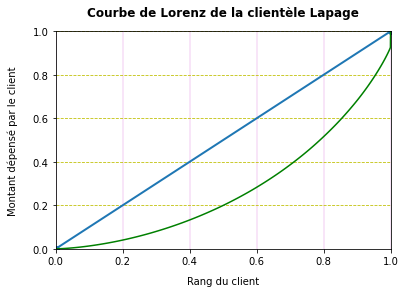

In [50]:
# code de la courbe de Lorenz

depenses = df_courbe_lorenz[df_courbe_lorenz['CA_client']>0]
dep = + depenses['CA_client'].values

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)


xaxis = np.linspace(0-1/n,1+1/n,n+1)

plt.plot([0.0, 1.0], [0.0, 1.0], 'o-', lw=2)

plt.plot(xaxis, lorenz, drawstyle = 'steps-post', color = 'green')
plt.xlabel("Rang du client", labelpad = 10)
plt.ylabel("Montant dépensé par le client", labelpad = 15)


plt.grid(True)
plt.grid( which = 'major', axis='x', color='m', linewidth=0.2 )
plt.grid(which='major', axis='y', color='y', linestyle='dashed')

plt.title("Courbe de Lorenz de la clientèle Lapage",{'weight' : 'bold', 'size'   : 12}, pad = 15)

plt.rcParams["figure.figsize"] = (5,7)

plt.xlim(0,1)
plt.ylim(0,1)

plt.show()




In [51]:
# indice de gini
AUC =( lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2) / n 
S = 0.5 - AUC
gini = 2*S
print("Dans notre étude, l'indice de Gini est de:", round(gini,4))

Dans notre étude, l'indice de Gini est de: 0.4464


In [52]:
depense_mediale = np.interp(0.5, lorenz, np.linspace(0,1,n+1))
print( round(depense_mediale,2)*100, "% de nos clients représentent 50% de notre CA." " De ce fait, les autres", round(1 - depense_mediale,2)*100, "% de nos clients représentent 50% de notre CA")     

79.0 % de nos clients représentent 50% de notre CA. De ce fait, les autres 21.0 % de nos clients représentent 50% de notre CA


In [53]:
depense_ochenta = np.interp(0.8, lorenz, np.linspace(0,1,n+1))
print( round(depense_ochenta,2)*100, "% de nos clients représentent 80% de notre CA." " De ce fait, les autres", round(1 - depense_ochenta,2)*100, "% de nos clients représentent 20% de notre CA")     

96.0 % de nos clients représentent 80% de notre CA. De ce fait, les autres 4.0 % de nos clients représentent 20% de notre CA


# Chapter 3: Les demandes de Julie <a class="anchor" id="chapter3"></a>
### Section 3.1: le lien entre le genre d’un client et les catégories des livres achetés <a class="anchor" id="section_3_1"></a>

In [54]:
df_final.head()

,session_id,client_id,sex,birth,id_prod,price,categ,date_jours
0,s_211425,c_103,f,1986,0_1518,4.18,0.0,2022-05-20
1,s_158752,c_8534,m,1988,1_251,15.99,1.0,2022-02-02
2,s_225667,c_6714,f,1968,0_1277,7.99,0.0,2022-06-18
3,s_52962,c_6941,m,2000,2_209,69.99,2.0,2021-06-24
4,s_325227,c_4232,m,1980,0_1509,4.99,0.0,2023-01-11


In [55]:
# cette répartition représente des nombres, pas encore des moyennes (donc comparaison hommes / femmes non possible)
df_genre_categ = df_final.iloc[:,[1,2,6]].copy()
df_genre_categ = df_genre_categ.groupby(["sex","categ"]).agg({"client_id":'count'})
df_genre_categ.rename(columns={'client_id':"nb_achats_total"}, inplace = True)
df_genre_categ.head()

nb_achats_total
sex categ                 
f   0.0             206103
    1.0             114899
    2.0              17283
m   0.0             209356
    1.0             112270

In [56]:
# les nb achats moyens femme
df_f = df_final.iloc[:,[1,2,6]].copy()
df_f = df_f[df_f['sex'].eq('f')]
nb_femmes = len(df_f['client_id'].drop_duplicates())
df_f = df_f.groupby("categ").count()
df_f['nb_achat_moyenne_f'] = df_f['client_id'] / nb_femmes
del df_f["client_id"] 
del df_f["sex"]
df_f.head()

,nb_achat_moyenne_f
categ,
0.0,46.015405
1.0,25.652824
2.0,3.858674


In [57]:
# les nb achats moyens homme
df_m = df_final.iloc[:,[1,2,6]].copy()
df_m = df_m[df_m['sex'].eq('m')]
nb_hommes = len(df_m['client_id'].drop_duplicates())
df_m = df_m.groupby("categ").count()
df_m['nb_achat_moyenne_m'] = df_m['client_id'] / nb_hommes
del df_m["client_id"] 
del df_m["sex"]
df_m.head()

,nb_achat_moyenne_m
categ,
0.0,50.802232
1.0,27.243388
2.0,4.659063


In [58]:
print("Parmi nos clients, nous avons : " ,nb_femmes," femmes et ",nb_hommes, "hommes.")

Parmi nos clients, nous avons :  4479  femmes et  4121 hommes.


In [59]:
df_genre_categ = pd.concat([df_f,df_m], axis=1)
df_genre_categ.head()

,nb_achat_moyenne_f,nb_achat_moyenne_m
categ,,
0.0,46.015405,50.802232
1.0,25.652824,27.243388
2.0,3.858674,4.659063


Text(0, 0.5, "Nombre d'achats moyens")

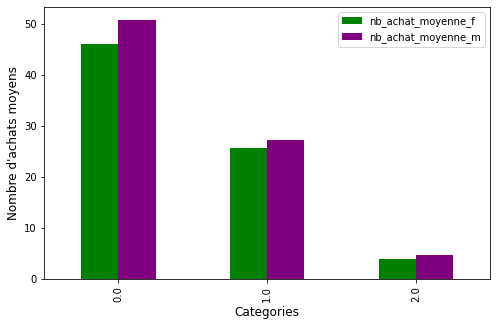

In [60]:
df_genre_categ.plot.bar(figsize =(8,5), color =('green', 'purple'))
plt.xlabel('Categories', size = 12)
plt.ylabel("Nombre d'achats moyens", size = 12)

In [61]:
df_genre_categ.reset_index(inplace = True)

In [62]:
# Ces répartitions proches sont-elles le fruit du hasard? Non allons analyser cela avec un test du khi-2

In [63]:
df_genre_categ = df_final.iloc[:,[1,2,6]].copy()
df_genre_categ.head()

,client_id,sex,categ
0,c_103,f,0.0
1,c_8534,m,1.0
2,c_6714,f,0.0
3,c_6941,m,2.0
4,c_4232,m,0.0


In [64]:
X = "categ"
Y = "sex"

cont = df_genre_categ[[X,Y]].pivot_table(index=X,columns=Y,aggfunc= len ,margins=True,margins_name="Total")
cont

sex,f,m,Total
categ,,,
0.0,206103,209356,415459
1.0,114899,112270,227169
2.0,17283,19200,36483
Total,338285,340826,679111


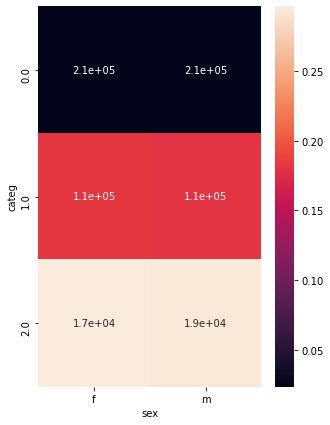

In [65]:

import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_genre_categ)
indep = tx.dot(ty) / n

c = cont.fillna(0) 
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [66]:
# interprétation : La jauge latériale nous indique une vlauer, une contribution à la non indépendance
# plus la valer est proche de 1, plus la case sera source de non indépendance

### Section 3.2: le lien entre l'âge des clients et le montant total des achats <a class="anchor" id="section_3_2"></a>

In [67]:
df_final.head()

,session_id,client_id,sex,birth,id_prod,price,categ,date_jours
0,s_211425,c_103,f,1986,0_1518,4.18,0.0,2022-05-20
1,s_158752,c_8534,m,1988,1_251,15.99,1.0,2022-02-02
2,s_225667,c_6714,f,1968,0_1277,7.99,0.0,2022-06-18
3,s_52962,c_6941,m,2000,2_209,69.99,2.0,2021-06-24
4,s_325227,c_4232,m,1980,0_1509,4.99,0.0,2023-01-11


In [68]:
# je prends les variables nécessaires
# je groupby par client, puis je montre le montant du panier de chaque client 

df_age_montant = df_final.iloc[:,[1,3,5]].groupby(["client_id", "birth"]).sum('price')
df_age_montant.rename(columns = {"price":"CA_client"}, inplace = True)
df_age_montant.reset_index(inplace = True)
print("Chez Lapage, nous recensons:", len(df_age_montant), "clients.")


Chez Lapage, nous recensons: 8600 clients.


In [69]:
# on se sert de la date de naissance pour trouver l'âge du client
pd.to_numeric(df_age_montant['birth'])
df_age_montant['âge'] = (2021 - df_age_montant["birth"])
del df_age_montant["birth"]
df_age_montant['âge'] 
df_age_montant.head()

,client_id,CA_client,âge
0,c_1,558.18,66
1,c_10,1353.60,65
2,c_100,254.85,29
3,c_1000,2261.89,55
4,c_1001,1812.86,39


In [70]:
# on a maintenant l'âge de chaque client: on peut réunir les clients par leurs âges et regarder le panier moyen y étant associé    
df_age_montant = df_age_montant.groupby(["âge"]).mean('CA_client')

""" 
on voit un panier moyen très élevé (>1000€/client). Etonnant. 
Mais rappelons-nous: nous avons 11 millions de CA, pour 8000 clients
Pour ordre d'échelle: 11*10**6 / 8*10**3 = 1200-1400€ / clients
nos valeurs font donc sens
"""
df_age_montant.head() 

,CA_client
âge,
17,1393.624005
18,1228.936414
19,1270.188621
20,1427.981600
21,1213.293971


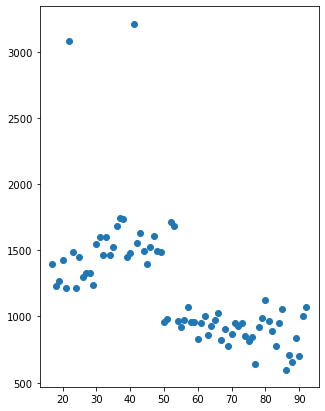

In [71]:
# le scatter plot pourrait suggérer une potentiel relation
plt.scatter( x = df_age_montant.index, y = df_age_montant['CA_client'])
# mais ici ce n'est pas le cas. Aucun corrélation apparente 

In [72]:
"""
Vérifions cette absence de corrélation entre nos variables via un test paramétrique (ou non-paramétrique)
Ici nos données sont quantitatives continues. Nous choisirons l'option "coefficient de corrélation de Pearson"
Un coefficient de corrélation mesure la force de la liaison (positive ou négative) qui peut exister entre deux variables quantitatives.
DataFrame.corr(method='pearson', min_periods=1)
"""
# le coefficient de corrélation de Pearson confirmera ou non notre observation

'\nVérifions cette absence de corrélation entre nos variables via un test paramétrique (ou non-paramétrique)\nIci nos données sont quantitatives continues. Nous choisirons l\'option "coefficient de corrélation de Pearson"\nUn coefficient de corrélation mesure la force de la liaison (positive ou négative) qui peut exister entre deux variables quantitatives.\nDataFrame.corr(method=\'pearson\', min_periods=1)\n'

In [73]:
df_age_montant['âge'] = df_age_montant.index

df_age_montant['âge'].corr(df_age_montant['CA_client'], method='pearson' )
# explication: plus ce coefficient est proche de -1 ou +1, plus l’association entre les deux variables est forte
# ici on voit qu'il y aurait une tendance de corrélation négative non linéaire, mais à nuancer

-0.6336339512169257

### Section 3.3: le lien entre l'âge des clients et la fréquence d'achat <a class="anchor" id="section_3_3"></a>

In [74]:
df_final.head()

,session_id,client_id,sex,birth,id_prod,price,categ,date_jours
0,s_211425,c_103,f,1986,0_1518,4.18,0.0,2022-05-20
1,s_158752,c_8534,m,1988,1_251,15.99,1.0,2022-02-02
2,s_225667,c_6714,f,1968,0_1277,7.99,0.0,2022-06-18
3,s_52962,c_6941,m,2000,2_209,69.99,2.0,2021-06-24
4,s_325227,c_4232,m,1980,0_1509,4.99,0.0,2023-01-11


In [75]:
date_min = df_final['date_jours'].min()
date_max = df_final['date_jours'].max()
interval = date_max - date_min
interval = interval.days
print("Notre période d'étude se déroule sur:",interval)

Notre période d'étude se déroule sur: 729


In [76]:
# on va utiliser les sessions + date. Une session = un acte d'achat

In [77]:
df_age_frequence = df_final.iloc[:,[0,1,3]].copy()
df_age_frequence['âge'] = (2021 - df_age_frequence["birth"])
del df_age_frequence["birth"]
df_age_frequence.head()

,session_id,client_id,âge
0,s_211425,c_103,35
1,s_158752,c_8534,33
2,s_225667,c_6714,53
3,s_52962,c_6941,21
4,s_325227,c_4232,41


In [78]:
# df_age_frequence.groupby["client_id","âge"].count('session_id')

In [79]:
df_age_frequence = df_age_frequence.groupby('client_id').agg({"âge": 'mean', "session_id":'count' })
df_age_frequence.rename(columns = {"session_id":"nb_session_indiv"}, inplace = True)
df_age_frequence['freq_indiv'] = interval / df_age_frequence['nb_session_indiv']
df_age_frequence.head()
# ici on peut voir que le client c_1 a commandé 39 fois, soit un fois tous les 18,69 jours en moyenne.

,âge,nb_session_indiv,freq_indiv
client_id,,,
c_1,66,39,18.692308
c_10,65,58,12.568966
c_100,29,8,91.125000
c_1000,55,125,5.832000
c_1001,39,102,7.147059


In [80]:
df_age_frequence = df_age_frequence.groupby("âge", as_index = False).agg({"nb_session_indiv":"mean","freq_indiv":"mean"})
df_age_frequence.rename(columns = {"nb_session_indiv":"nb_session_moyen","freq_indiv":"freq_moyenne"}, inplace = True)
df_age_frequence.head()

,âge,nb_session_moyen,freq_moyenne
0,17,34.665904,40.260782
1,18,30.144828,48.328491
2,19,31.613793,43.784328
3,20,34.016000,39.700914
4,21,32.448529,44.064073


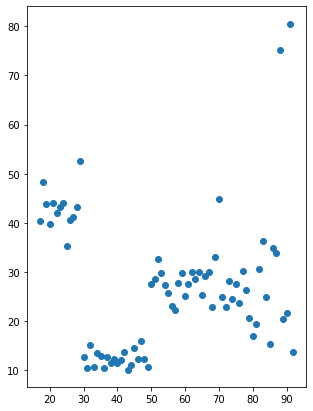

In [81]:
plt.scatter( x = df_age_frequence['âge'], y = df_age_frequence['freq_moyenne'])

In [82]:
df_age_frequence['âge'].corr(df_age_frequence['freq_moyenne'], method='pearson' )

0.026998316211544037

In [83]:
# absence de corrélation 

### Section 3.4: le lien entre l'âge des clients et la taille du panier moyen <a class="anchor" id="section_3_4"></a>

In [84]:
df_final.head()

,session_id,client_id,sex,birth,id_prod,price,categ,date_jours
0,s_211425,c_103,f,1986,0_1518,4.18,0.0,2022-05-20
1,s_158752,c_8534,m,1988,1_251,15.99,1.0,2022-02-02
2,s_225667,c_6714,f,1968,0_1277,7.99,0.0,2022-06-18
3,s_52962,c_6941,m,2000,2_209,69.99,2.0,2021-06-24
4,s_325227,c_4232,m,1980,0_1509,4.99,0.0,2023-01-11


In [85]:
# ici toutes nos étapes sont concentrées sans explication: il s'agit d'une requête très proche de celle âge/montant
df_age_quantite = df_final.iloc[:,[0,1,3,5]].copy()
pd.to_numeric(df_age_quantite['birth'])
df_age_quantite['âge'] = (2021 - df_age_quantite["birth"])
del df_age_quantite["birth"]
df_age_quantite = df_age_quantite.groupby(["session_id","client_id"]).agg({"âge":'mean',"price":'count'})
df_age_quantite.rename(columns = {"price":"nb_achat"}, inplace = True)
df_age_quantite = df_age_quantite.groupby(["âge"]).mean('nb_achat')
df_age_quantite.reset_index(inplace = True)
df_age_quantite.head()

,âge,nb_achat
0,17,1.762741
1,18,1.702766
2,19,1.760369
3,20,1.749074
4,21,1.822800


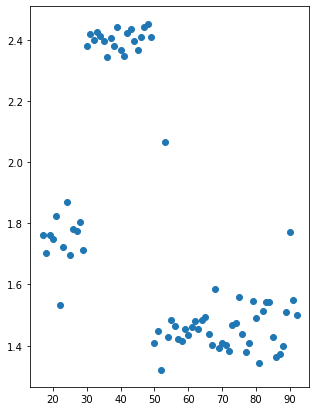

In [86]:
plt.scatter( x = df_age_quantite['âge'], y = df_age_quantite['nb_achat'])

In [87]:
df_age_quantite['âge'].corr(df_age_quantite['nb_achat'], method='spearman' )

-0.6120847573479152

In [88]:
""" 
Le coefficient de Spearman indique que la relation entre nos deux variables serait de type dégressif modérée. 
Cependant l'observation du nuage de point reste le plus important. 3 groupes se distinguent.
"""

" \nLe coefficient de Spearman indique que la relation entre nos deux variables serait de type dégressif modérée. \nCependant l'observation du nuage de point reste le plus important. 3 groupes se distinguent.\n"

### Section 3.5: le lien entre l'âge des clients et les catégories des livres achetés <a class="anchor" id="section_3_5"></a>

In [89]:
df_final.head()

,session_id,client_id,sex,birth,id_prod,price,categ,date_jours
0,s_211425,c_103,f,1986,0_1518,4.18,0.0,2022-05-20
1,s_158752,c_8534,m,1988,1_251,15.99,1.0,2022-02-02
2,s_225667,c_6714,f,1968,0_1277,7.99,0.0,2022-06-18
3,s_52962,c_6941,m,2000,2_209,69.99,2.0,2021-06-24
4,s_325227,c_4232,m,1980,0_1509,4.99,0.0,2023-01-11


In [90]:
df_age_categ = df_final.iloc[:,[1,3,6]].copy()
df_age_categ['âge'] = (2021 - df_age_categ["birth"])
del df_age_categ["birth"]
df_age_categ.head()

,client_id,categ,âge
0,c_103,0.0,35
1,c_8534,1.0,33
2,c_6714,0.0,53
3,c_6941,2.0,21
4,c_4232,0.0,41


In [91]:
df_age_categ = df_age_categ.groupby(['âge','categ']).count()
df_age_categ.reset_index(inplace = True)
df_age_categ.rename(columns = {"client_id":"nb_achat_absolu"}, inplace = True)
df_age_categ.head()

,âge,categ,nb_achat_absolu
0,17,0.0,3418
1,17,1.0,5719
2,17,2.0,6012
3,18,0.0,909
4,18,1.0,1678


In [92]:
df_nb_clients_age = df_final.iloc[:,[1,3]].copy()
df_nb_clients_age['âge'] = (2021 - df_nb_clients_age["birth"])
del df_nb_clients_age["birth"]
df_nb_clients_age = df_nb_clients_age.groupby("client_id", as_index = False).mean()
df_nb_clients_age = df_nb_clients_age.groupby("âge", as_index = False).count()
df_nb_clients_age.rename(columns = {"client_id":"nb_client_cetage"}, inplace = True)
df_nb_clients_age.head()

,âge,nb_client_cetage
0,17,437
1,18,145
2,19,145
3,20,125
4,21,136


In [93]:
df_age_categ = df_age_categ.merge(df_nb_clients_age, how ='left', on = "âge")
df_age_categ.head()

,âge,categ,nb_achat_absolu,nb_client_cetage
0,17,0.0,3418,437
1,17,1.0,5719,437
2,17,2.0,6012,437
3,18,0.0,909,145
4,18,1.0,1678,145


In [94]:
df_age_categ['nb_achat_moyen'] = df_age_categ['nb_achat_absolu'] / df_age_categ['nb_client_cetage']
df_age_categ.head()

,âge,categ,nb_achat_absolu,nb_client_cetage,nb_achat_moyen
0,17,0.0,3418,437,7.821510
1,17,1.0,5719,437,13.086957
2,17,2.0,6012,437,13.757437
3,18,0.0,909,145,6.268966
4,18,1.0,1678,145,11.572414


In [95]:
df_0 = df_age_categ[df_age_categ['categ'].eq(0.0)]
y0 = df_0['nb_achat_moyen']
x0 = df_0['âge']

df_1 = df_age_categ[df_age_categ['categ'].eq(1.0)]
y1 = df_1['nb_achat_moyen']
x1 = df_1['âge']

df_2 = df_age_categ[df_age_categ['categ'].eq(2.0)]
y2 = df_2['nb_achat_moyen']
x2 = df_2['âge']

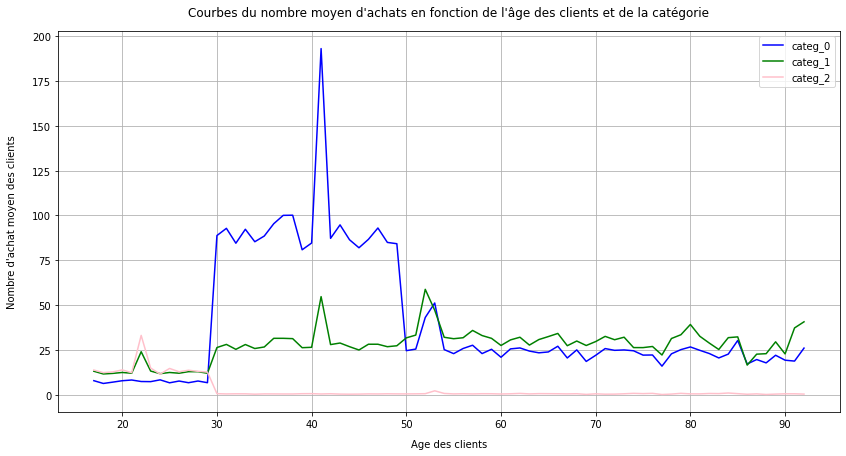

In [96]:
fig = plt.figure( figsize=(14, 7))
categ_0 = plt.plot(x0, y0, color ='blue')
categ_1 = plt.plot(x1, y1, color ='green')
categ_2 = plt.plot(x2, y2, color ='pink')

plt.xlabel("Age des clients", labelpad = 10)
plt.ylabel("Nombre d'achat moyen des clients", labelpad = 15)
plt.grid(True)
plt.title("Courbes du nombre moyen d'achats en fonction de l'âge des clients et de la catégorie",
          {'size'   : 12}, pad = 15)
plt.legend(['categ_0', 'categ_1', 'categ_2'])

plt.show()


In [97]:
# nous remarquons que les courbes catégorie 0 et catégorie 1 ont presque la même forme. Nous allons comparer ces catégories avec un test paramétrique
# nous allons utiliser un test de Student (non apparié), pour comparer leurs moyennes et voir elles sont significativement différentes

In [98]:
# Hypothèse nulle (Ho) : les moyennes des catégories sont identiques 
# Hypothèse alternative (H1) : les moyennes des catégories sont différentes 

# 1) Contrôler la normalité des échantillons

X0 = df_0['nb_achat_moyen']
X1 = df_1['nb_achat_moyen']

from scipy.stats import shapiro
x0, pval0 = shapiro(X0)
x1, pval1 = shapiro(X1)

print(pval0)
print(pval1)



5.000968528179328e-10
7.874789844208863e-06


In [99]:
# 2) Contrôler l'égalité des variances avec un Fisher-Snedecor F-test
from scipy.stats import f
f(X0,X1)

# Anova unidirectionnelle
import scipy.stats as stats
stats.f_oneway(X0,X1)

F_onewayResult(statistic=8.504919266913376, pvalue=0.004086107855620418)

In [100]:
# Comparons les deux échantillons pour voir s'ils sont significativement différents
import scipy.stats as stats
y = stats.ttest_ind(X0,X1) ; print(y)

Ttest_indResult(statistic=2.9163194727110047, pvalue=0.0040861078556203466)


In [101]:
print(y[1])
# la p-value est inférieure au seuil de significativité 0,05, nous acceptons H1:
# les valeurs moyennes des catégories 0 et 1 sont significativement différentes

0.0040861078556203466


### Section 3.6: La probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159 <a class="anchor" id="section_3_6"></a>


In [102]:
df_final.head()

,session_id,client_id,sex,birth,id_prod,price,categ,date_jours
0,s_211425,c_103,f,1986,0_1518,4.18,0.0,2022-05-20
1,s_158752,c_8534,m,1988,1_251,15.99,1.0,2022-02-02
2,s_225667,c_6714,f,1968,0_1277,7.99,0.0,2022-06-18
3,s_52962,c_6941,m,2000,2_209,69.99,2.0,2021-06-24
4,s_325227,c_4232,m,1980,0_1509,4.99,0.0,2023-01-11


In [103]:
df_clients_B = df_final[df_final["id_prod"] == '2_159']
df_clients_B = df_clients_B.drop_duplicates(subset = 'client_id')
p_B = len(df_clients_B) 
print("Ainsi,", p_B ,"clients ont achetés l'id_prod 2_159.")

Ainsi, 530 clients ont achetés l'id_prod 2_159.


In [104]:
df_clients_A = df_final[df_final["id_prod"] == '0_525']
df_clients_A = df_clients_A.drop_duplicates(subset = 'client_id')
df_clients_AetB = df_clients_A.merge(df_clients_B, how = 'inner', on = "client_id" )
p_AetB = len(df_clients_AetB)

print("Ainsi, parmi les clients ayants achetés l'id_prod 2_159,", p_AetB, " ont aussi acheté id_prod 0_525.")

Ainsi, parmi les clients ayants achetés l'id_prod 2_159, 459  ont aussi acheté id_prod 0_525.


In [105]:
resultat =  round((p_AetB / p_B)*100,2)
print("Pour conclure, la probabilité qu'un client achète A en ayant acheté B également est de:", resultat,"%.")

Pour conclure, la probabilité qu'un client achète A en ayant acheté B également est de: 86.6 %.
